# Introduction

Ce projet consiste en la réalisation d'un algorithme de labellisation automatique de vêtements à partir de leur photographie.

Nous pensons qu’un tel algorithme de labellisation peut avoir plusieurs applications directes en entreprise, notamment lorsqu’on parle de Marketplaces (d'articles vestimentaires en l’occurrence) qui reçoivent beaucoup de marchandise quotidiennement. Ces nombreux habits proviennent de divers acteurs de l’industrie qui ne suivent pas nécessairement la même nomenclature en terme de labels, ou utilisent des labels qui ne correspondent pas nécessairement à l’attente de la clientèle/du Marketplace. Un tel algorithme permettrait alors de poser une classification centralisée et homogène pour tous les articles transitant par le Marketplace, sans engager d’efforts humain ou économique supplémentaires.

Pour ce projet, nous sommes partis d'une base de donnée que nous avons scrappé sur le site d'Auchan et à laquelle nous avons appliqué des méthodes de Deep Learning afin de séparer les photos des différents vêtements en 4 catégories : T-Shirt, Pull, Pantalon, Shirt. Nous sommes parvenus à obtenir une efficacité de 95% sur notre algorithme.

# Statistiques descriptives


Dans un premier temps, menons une étude statistique sur la base de donnée que nous avons collectée.


## 0) Mise en place de l'espace de travail

Nous importons les données.

Pour démarrer, renseignez la variable path ci-dessous, en y inscrivant le chemin menant au dataset sur votre ordinateur.

In [14]:
path = "C:/Users/wawa_/Downloads/python_project_dataset/python_project_dataset"

Ensuite, chargeons chaque classe de données dans une variable au nom de la classe.

In [15]:
import os
pull = os.listdir(path=path+'/pull')
tshirt = os.listdir(path=path+'/tshirt')
short = os.listdir(path=path+'/short')
pantalon = os.listdir(path=path+'/pantalon')

Chacune de ces variables ne contient que le nom des images. Par exemple, pull[0] = 'h0015147760549918.jpg'. 

Ainsi, pour avoir accès au premier pull du dataset il faut faire la commande suivante :



```
path + '/pull/' + pull[0]
```



Jetons un coup d'oeil à nos donéees. On génère 2 images aléatoirement par classe à l'aide de la fonction **two_random_images**  :

In [ ]:
?two_random_images

In [ ]:
two_random_images('pull')
two_random_images('tshirt')
two_random_images('short')
two_random_images('pantalon')

## 1) Premières statistiques


Nous pouvons alors avoir de premières statistiques, comme la distribution des tailles de fichiers :

In [ ]:
?first_stats

In [ ]:
first_stats()

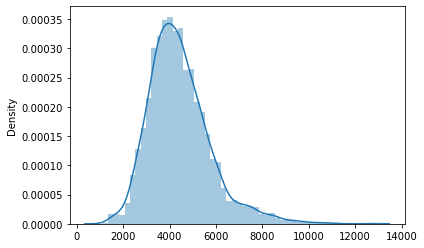

Étonnement, cette distribution semble suivre une loi normale !

Statistique sur la répartitions des catégories de vêtements de la base de données :



In [ ]:
?pie_chart_categories()

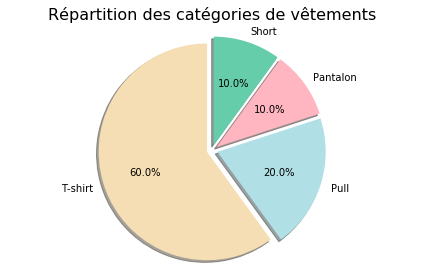

In [16]:
pie_chart_categories()

On remarque ainsi une large sur-représentation de T-shirts dans la base de donnée, dû sans doute à une prédominance de ces articles sur le commerce de vêtements en ligne.


## 2) Une couleur prédominante ?

Dans cette sous-partie, nous allons analyser la repartition de la couleur majoritaire de chaque vêtements par classe. Nous nous restreignons aux 12 couleurs suivantes : Blanc, Noir, Gris, Rouge, Marron, Jaune, Vert, Cyan, Bleu, Violet, Rose. Par exemple, pour tous les pulls, nous allons compter le nombre de pulls blancs, noirs, gris etc... Pour les vêtements qui ont plusieurs couleurs, nous prendrons en compte la couleur majoritaire. 

Pour ce faire, nous allons utiliser trois fonctions similaires (**colour_repartition_mean**, **colour_reparition_cluster**, **colour_repartition_major**) mais qui utilisent trois méthodes différentes ("mean", "cluster", "major") qui seront expliqués un peu plus loin. 

Chacune des ces fonctions utilisent la fonction "**major_colour**" qui, étant donné un triplet rgb donne la couleur la plus proche (parmis les couleurs citées précédemment) au sens de la distance euclidienne. Avant le traitement de l'image par ces fonctions, nous zoomons l'image afin de ne plus avoir les couleurs environnante (en particulier le blanc du fond) et nous concentrer sur la couleur du vêtement en elle-même. Nous utiliserons alors sans distinction "couleur de l'image" et "couleur du vêtement" dans la suite.

### a) Méthode "mean"

La première méthode utilisée est celle que nous avons nommé "mean". C'est la méthode la plus naive. Il s'agit de faire la moyenne de la matrice RGB de tous les pixels de sorte à avoir le triplet (r,g,b) moyen de l'image. On calcule ensuite la couleur la plus proche grace à la fonction "major_colour".

In [ ]:
?colour_repartition_mean

Object `colour_repartition_mean` not found.


In [ ]:
pull_colours_mean = colour_repartition_mean('pull', percentage = 1)
tshirt_colours_mean = colour_repartition_mean('tshirt', percentage = 1)
pantalon_colours_mean = colour_repartition_mean('pantalon', percentage = 1)
short_colours_mean = colour_repartition_mean('short', percentage = 1)

Les variables que nous venont de créer sont des dictionnaires dont les clés sont des couleurs et dont les valeurs comptabilisent le nombre de vêtements de la même couleur que la clé associée.

Par exemple, la dernière ligne nous donne 

```
# {'Blanc': 14,
 'Noir': 40,
 'Gris': 181,
 'Rouge': 5,
 'Marron': 15,
 'Jaune': 1,
 'Vert': 1,
 'Cyan': 2,
 'Bleu': 40,
 'Violet': 57,
 'Rose': 2}
```

Il y a donc 14 shorts blancs, 40 shorts bleus etc...


On peut alors tracer un histogramme du nombre de couleurs pour chaque classe.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_mean', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_mean.keys()), 
            x=list(pull_colours_mean.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_mean.keys()), 
            x=list(short_colours_mean.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_mean.keys()), 
            x=list(pantalon_colours_mean.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_mean.keys()), 
            x=list(tshirt_colours_mean.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Les resultats peuvent être long à obtenir lorsque "percentage=1", nous affichons les histogrammes obtenus avec toute la base de donnée ci-après.

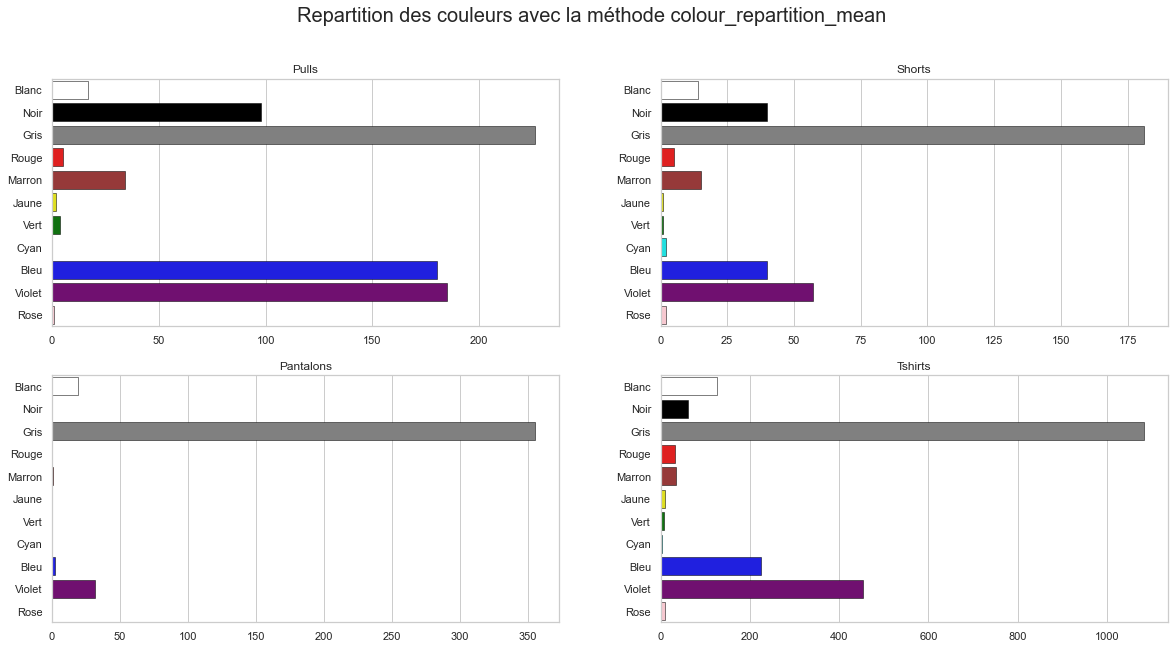

On remarque que le gris est plutôt majoritaire. Cela est causé par la méthode employée. En effet, faire une moyenne du RGB de tous les pixels est susceptible de nous donner un triplet (r,g,b) tels que r,g et b soient plutôt proche, ce qui correspond à du gris. Ce problème est resolu par la méthode suivante.

## b) Méthode "major"

La méthode major repose sur le principe suivant : on determine la couleur la plus proche de chaque pixel d'une image à l'aide de "**major_colour**". La couleur qui a le plus de pixel associé est designée comme la couleur du vêtement. Les variables suivantes sont crées d'une façon similaire à celles précédemment crées.

In [ ]:
?colour_repartition_major

In [ ]:
pull_colours_major = colour_repartition_major('pull', percentage=1)
tshirt_colours_major = colour_repartition_major('tshirt', percentage=1)
pantalon_colours_major = colour_repartition_major('pantalon', percentage=1)
short_colours_major = colour_repartition_major('short', percentage=1)

**Attention** : la cellule prend plusieurs heures pour se lancer, il est donc préférable de changer la variable percentage (qui règle le pourcentage du dataset à charger dans l'utilisation de la fonction) à 0.1 voire 0.01.

On peut tracer les histogrammes pour chaque classe.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_major', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_major.keys()), 
            x=list(pull_colours_major.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_major.keys()), 
            x=list(short_colours_major.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_major.keys()), 
            x=list(pantalon_colours_major.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_major.keys()), 
            x=list(tshirt_colours_major.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Pour les mêmes raisons que précédemment, nous affichons les graphiques obtenus avec l'ensemble de la base de donées.

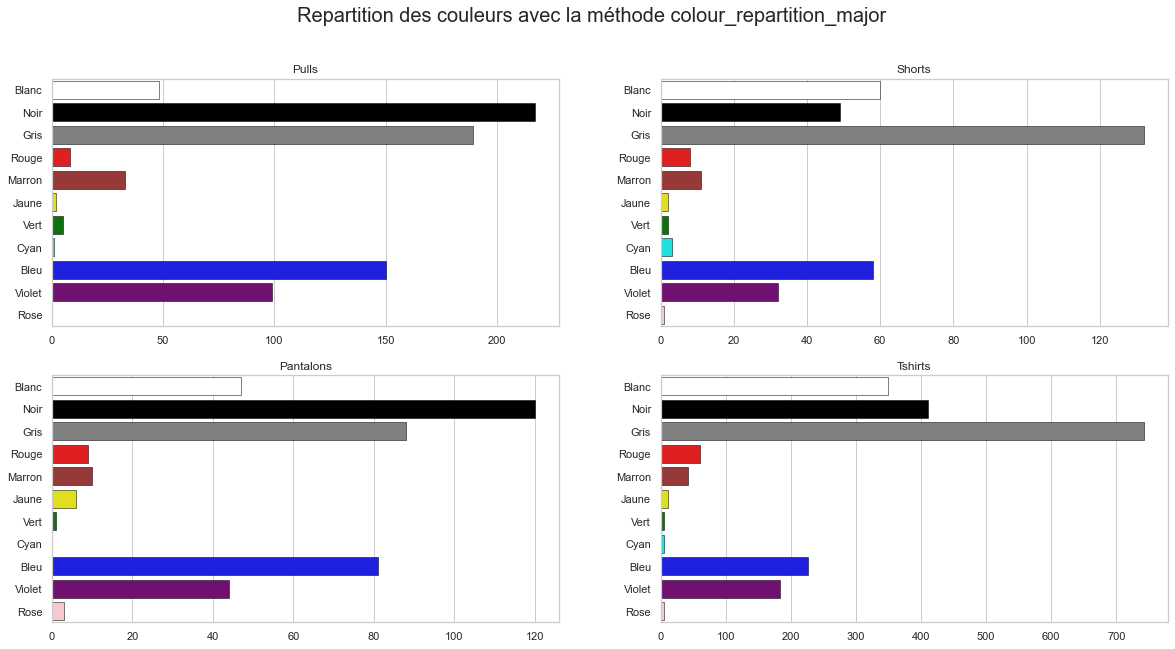

On remarque que le problème précédent semble réglé : dans deux cas sur trois, le gris n'est plus la couleur majoritaire. Le gris reste cependant assez prédominant (ainsi que le blanc et le noir) mais cela est dû au fait que la majorité des vêtements sont d'une de ces trois couleurs.

## c) Méthode "cluster"

Cette méthode est basé sur l'algorithme des k-means. Nous choisissons le nombre de cluster égal à 2 car après quelques essais, cela semble être le plus efficace. Cela reste cependant arbitraire, étant donné que ce n'est pas le coeur du projet et que cette partie nous permet surtout d'avoir une première idée du dataset, nous n'avons pas poussé l'optimisation au maximum.

In [ ]:
?colour_repartition_cluster

In [ ]:
pull_colours_cluster = colour_repartition_cluster('pull', percentage=1, ncluster=2)
tshirt_colours_cluster = colour_repartition_cluster('tshirt',percentage=1, ncluster=2)
pantalon_colours_cluster = colour_repartition_cluster('pantalon', percentage=1, ncluster=2)
short_colours_cluster = colour_repartition_cluster('short', percentage=1, ncluster=2)

Ainsi que les histogrammes correspondants.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_cluster', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_cluster.keys()), 
            x=list(pull_colours_cluster.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_cluster.keys()), 
            x=list(short_colours_cluster.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_cluster.keys()), 
            x=list(pantalon_colours_cluster.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_cluster.keys()), 
            x=list(tshirt_colours_cluster.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Enfin, les histogrames obtenus pour la base de données complète.

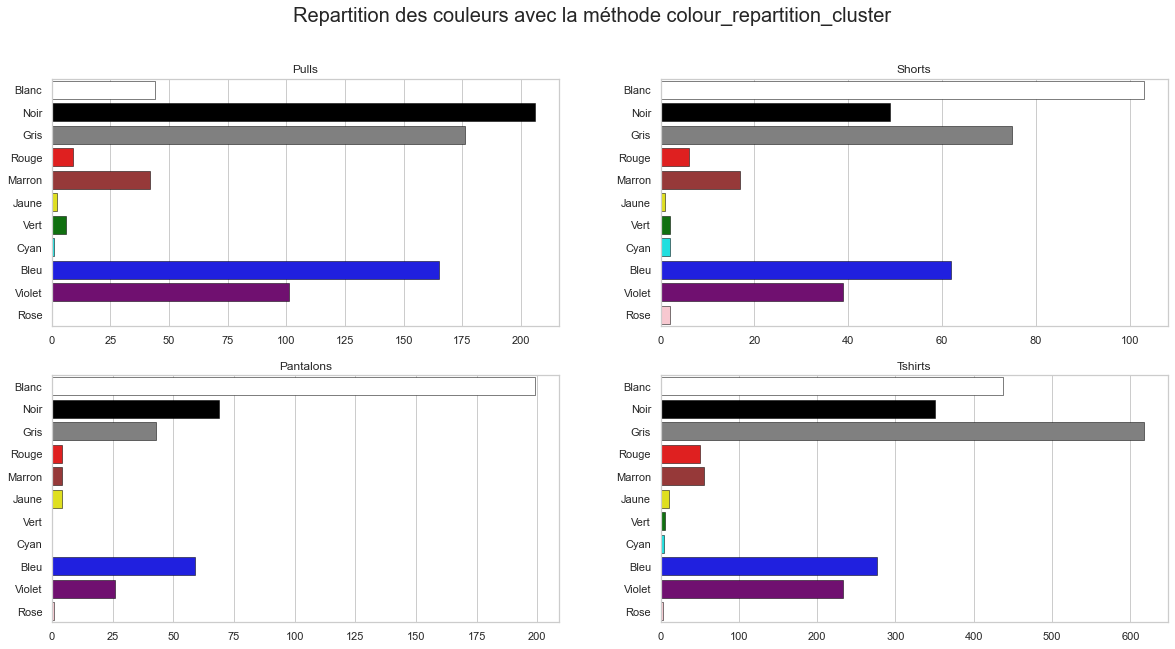

La quantité de vêtements gris a diminué, mais on note une recrudescence des vêtements de couleur blanche. On remarque c'est le cas surtout pour les shorts et les pantalons : le zoom de l'image qui nous permet de nous debarasser du fond blanc fonctionne moins bien sur les shorts et les pantalons (vu la disposition de ces derniers), ce qui peut expliquer la grande quantité de vêtements considérés comme blancs.

In [ ]:
?od.detectObjectsFromImage

## 3) Les habits font-ils fond blanc ?

Nous nous sommes intéressés aux couleurs de vêtements qui prédominaient, cependant il pourrait être tout autant intéressant de se pencher sur une question de fond, et en particulier de fond blanc ; quel pourcentage de la base de donnée représentent les vêtements ayant été pris en photo sur fond blanc ? Ces derniers sont particulièrement intéressants, en ce qu'ils fournissent un cadre d'apprentissage homogène pour l'algorithme, exempts de tout bruit extérieur.

Pour les besoins de cette partie, nous allons importer toutes les images de la base de données dès maintenant.

In [ ]:
target_size = (256,256) 
data_pull = []
data_tshirt = []
data_pantalon = []
data_short = []
data_all = []

time1 = time.time()
compteur_1=0

for i in range(len(pull)):  
    data_pull.append(load_img(path + "/pull/" + pull[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(tshirt)):  
    data_tshirt.append(load_img(path + "/tshirt/" + tshirt[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(pantalon)):  
    data_pantalon.append(load_img(path + "/pantalon/" + pantalon[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(short)):  
    data_short.append(load_img(path + "/short/" + short[i],target_size=target_size))
    compteur_1+=1

data_all = data_pull + data_tshirt + data_pantalon + data_short

print("Importation terminée. L'importation des {} images a duré {} secondes".format(compteur_1,time.time()-time1))    

Importation terminée. L'importation des 3571 images a duré 3.563572645187378 secondes


Certains algorithmes n'ont pas besoin de photos de bonne qualité, nous allons donc également créer des listes de photo en (très) basse résolution.

In [ ]:
target_size = (50,50) 
data_pull_lowres = []
data_tshirt_lowres = []
data_pantalon_lowres = []
data_short_lowres = []
data_all_lowres = []

time1 = time.time()
compteur_1=0

for i in range(len(pull)):  
    data_pull_lowres.append(load_img(path + "/pull/" + pull[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(tshirt)):  
    data_tshirt_lowres.append(load_img(path + "/tshirt/" + tshirt[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(pantalon)):  
    data_pantalon_lowres.append(load_img(path + "/pantalon/" + pantalon[i],target_size=target_size))
    compteur_1+=1
    
for i in range(len(short)):  
    data_short_lowres.append(load_img(path + "/short/" + short[i],target_size=target_size))
    compteur_1+=1

data_all_lowres = data_pull_lowres + data_tshirt_lowres + data_pantalon_lowres + data_short_lowres

print("Importation terminée. L'importation des {} images a duré {} secondes".format(compteur_1,time.time()-time1))    

Importation terminée. L'importation des 3571 images a duré 2.9346702098846436 secondes


Nous utilisons une méthode de reconnaissance pixel par pixel. Afin de déterminer si un pixel donné est blanc ou non, nous allons considérer une notion de **threshold** et une notion de **distance** : si les trois coordonnées rgb du pixel sont assez proches de 256 (*i.e.* dépassent tous les trois une limite qu'on a définie arbitrairement, un threshold) et sont assez proche en terme de distance euclidienne (pour ne pas avoir de couleur prédominante), alors on considérera que le pixel donné est blanc. La fonction effectuant ce travail est la fonction **is_white**.

In [ ]:
?is_white

Pour déterminer si une image est sur fond blanc, nous allons intégrer le calcul ci-dessus sur tous les pixels de la photo via la fonction **is_white_background**. Si le pourcentage de pixels blancs dépasse un certain seuil (défini sur 30% par défaut), alors l'image sera considérée comme étant sur fond blanc, et la fonction renverra *True*.

In [ ]:
?is_white_background

Pour généraliser ce calcul à toutes les photos de la base de donnée et déterminer la fraction de photos sur fond blanc, nous allons utiliser la fonction **percentage_true** (qui reviendra plusieurs fois dans les parties qui viennent), qui prend en argument une base de données d'images ainsi qu'une fonction booléenne, et qui renvoie le pourcentage d'images de la base de données pour lesquelles la fonction booléenne renvoie *True*.

In [ ]:
?percentage_true

En l'occurence, si on applique percentage_true à notre base de données d'images et à la fonction is_white_background, nous obtiendrons le pourcentage d'images ayant un fond blanc.  

Avant cela, nous aimerions montrer un aperçu de l'algorithme via les fonctions **is_white_background_feedback** et **percentage_true_feedback**.  
(De manière générale, les fonctions **x**\_feedback fonctionnent de la même manière que les fonctions originelles **x**, mais fournissent un retour utilisateur supplémentaire).

In [ ]:
?is_white_background_feedback

In [ ]:
?percentage_true_feedback

Prévisualisons donc l'algorithme sur trois images de chaque base de données :

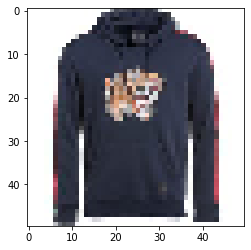

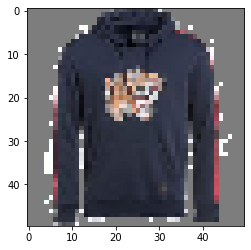

FOND BLANC. Pourcentage de pixels blancs :  32.32


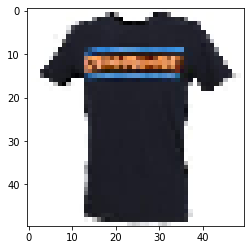

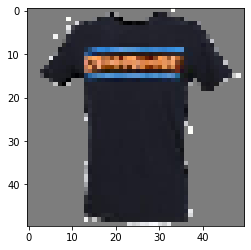

FOND BLANC. Pourcentage de pixels blancs :  47.0


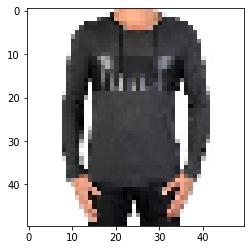

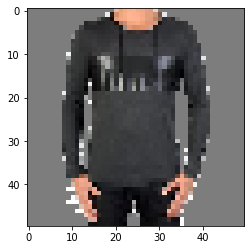

FOND BLANC. Pourcentage de pixels blancs :  43.96


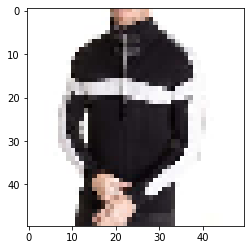

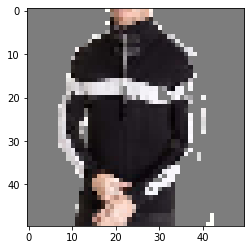

FOND BLANC. Pourcentage de pixels blancs :  51.160000000000004


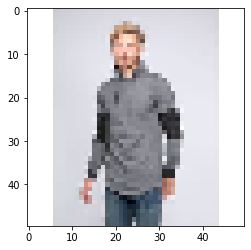

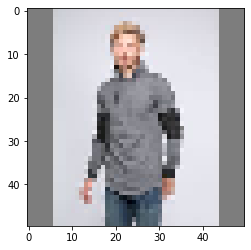

PAS DE FOND BLANC. Pourcentage de pixels blancs :  24.04


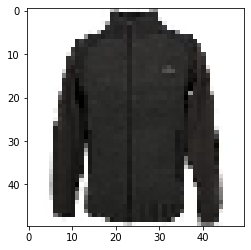

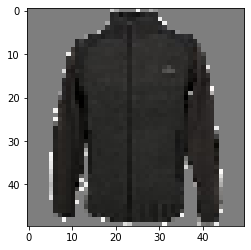

FOND BLANC. Pourcentage de pixels blancs :  36.720000000000006


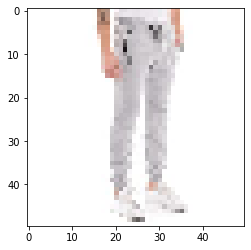

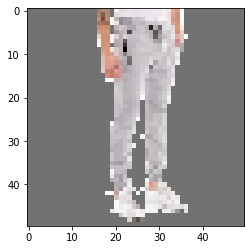

FOND BLANC. Pourcentage de pixels blancs :  73.36


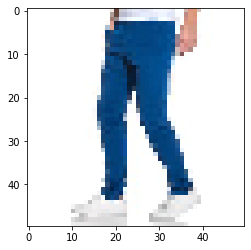

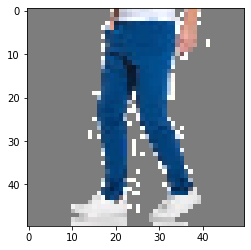

FOND BLANC. Pourcentage de pixels blancs :  65.84


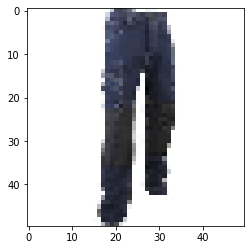

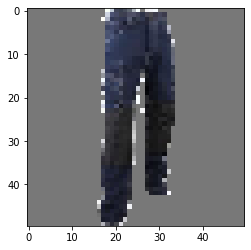

FOND BLANC. Pourcentage de pixels blancs :  73.44000000000001


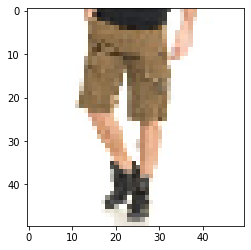

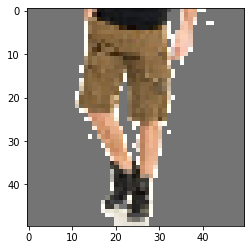

FOND BLANC. Pourcentage de pixels blancs :  66.60000000000001


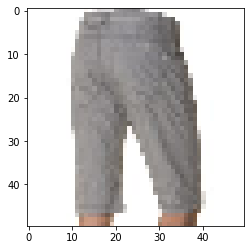

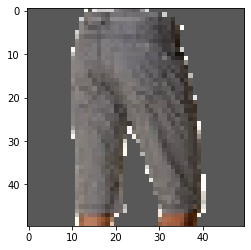

FOND BLANC. Pourcentage de pixels blancs :  49.8


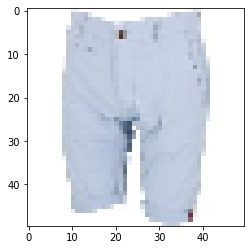

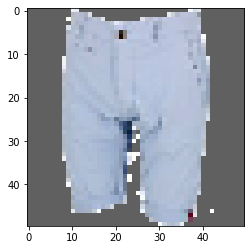

FOND BLANC. Pourcentage de pixels blancs :  42.32
Dans l'échantillon donné, il y a 91.66666666666666 % de photos sur fond blanc.


In [ ]:
tshirt_sample = random.sample(data_tshirt_lowres,3)
pull_sample = random.sample(data_pull_lowres,3)
pantalon_sample = random.sample(data_pantalon_lowres,3)
short_sample = random.sample(data_short_lowres,3)
sample = tshirt_sample + pull_sample + pantalon_sample + short_sample


pourcent_sample =  percentage_true_feedback(sample, is_white_background_feedback)
print("Dans l'échantillon donné, il y a",pourcent_sample ,"% de photos sur fond blanc.")

Le gris sur les images sert à montrer à l'utilisateur quels pixels ont été considérés comme blancs ou non par notre algorithme. Nous pouvons également nous limiter à l'usage des images très faible résolution (**50x50**) pour ce qui est de l'établissement d'un pourcentage. Cela augmente drastiquement la vitesse de l'algorithme, pour des pertes négligeables

Ceci dit, certaines images sont sur fond blanc écru ou gris, que notre algorithme va naïvement ignorer : elles ne seront pas considérés comme fond blanc. Nous pourrions les y inclure, en augmentant la permission avec lequel un pixel est considéré comme "blanc", mais cela aurait pour effet de considérer certains T-shirts blancs comme faisant partie du fond. Nous avons donc réalisé un arbitrage entre ces deux effets contraires, en jouant sur les valeurs du threshold et de la distance. L'efficacité d'un tel algorithme ne sera jamais de 100%, mais elle est bien assez grande pour établir une statistique fiable sur la répartition des photos sur fond blanc ou non. 

Voici ci-dessous l'ensemble des résultats que nous obtenons :

In [ ]:
#Environ 2 minutes d'exécution. Vous pouvez retrouver les résultats que nous avons déjà calculé dans 
#la cellule en dessous.

print("Pourcentage de T-shirts sur fond blanc :\n")
percentage_white_background_tshirt = percentage_true(data_tshirt_lowres, is_white_background)
print("Il y a", percentage_white_background_tshirt ,"% de T-shirts sur fond blanc.\n")

print("Pourcentage de Pulls sur fond blanc :\n")
percentage_white_background_pull = percentage_true(data_pull_lowres, is_white_background)
print("Il y a", percentage_white_background_pull ,"% de Pulls sur fond blanc.\n")

print("Pourcentage de Shorts sur fond blanc :\n")
percentage_white_background_short = percentage_true(data_short_lowres, is_white_background)
print("Il y a", percentage_white_background_short ,"% de Shorts sur fond blanc.\n")

print("Pourcentage de Pantalons sur fond blanc :\n")
percentage_white_background_pantalon = percentage_true(data_pantalon_lowres, is_white_background)
print("Il y a", percentage_white_background_pantalon ,"% de Pantalons sur fond blanc.\n")

print("Pourcentage total d'habits sur fond blanc :\n")
percentage_white_background_all = 1/len(data_all_lowres) * (percentage_white_background_tshirt * len(data_tshirt_lowres) + percentage_white_background_pull * len(data_pull_lowres) + percentage_white_background_short * len(data_short_lowres) + percentage_white_background_pantalon * len(data_pantalon_lowres))
print("Il y a au total", percentage_white_background_all ,"% d'habits sur fond blanc.\n")

Pourcentage de T-shirts sur fond blanc :

200 images. Nous en sommes à : 9.77 % d'avancement.
400 images. Nous en sommes à : 19.54 % d'avancement.
600 images. Nous en sommes à : 29.31 % d'avancement.
800 images. Nous en sommes à : 39.08 % d'avancement.
1000 images. Nous en sommes à : 48.85 % d'avancement.
1200 images. Nous en sommes à : 58.62 % d'avancement.
1400 images. Nous en sommes à : 68.39 % d'avancement.
1600 images. Nous en sommes à : 78.16 % d'avancement.
1800 images. Nous en sommes à : 87.93 % d'avancement.
2000 images. Nous en sommes à : 97.7 % d'avancement.
Il y a 88.5686370297997 % de T-shirts sur fond blanc.

Pourcentage de Pulls sur fond blanc :

200 images. Nous en sommes à : 26.49 % d'avancement.
400 images. Nous en sommes à : 52.98 % d'avancement.
600 images. Nous en sommes à : 79.47 % d'avancement.
Il y a 85.1655629139073 % de Pulls sur fond blanc.

Pourcentage de Shorts sur fond blanc :

200 images. Nous en sommes à : 55.87 % d'avancement.
Il y a 69.55307262569832 %

Au total, après calcul, nous avons trouvé **89%** de T-Shirts sur fond blanc, **85%** de Pulls sur fond blanc, **70%** de Shorts sur fond blanc, **89%** de Pantalons sur fond blanc, pour un total de **86%** photos sur fond blanc. Il y a une légère différence sur le taux de Shorts sur fond blanc avec le reste des habits (qui pourrait être dû à notre algorithme grossier tout comme à la base de données), mais globalement les images sur fond blanc restent très dominantes sur l'ensemble des photos.



Il semblerait donc que cette base de données fournit un cadre idoine à l'apprentissage d'un algorithme de Deep Learning de ce point de vue. Et c'est sans compter encore une fois sur les photos sur fond gris qui ont été ignorées par notre algorithme naïf ci-dessus, mais qui ne tromperons par un algorithme plus développé.

In [ ]:
?pie_chart_logo

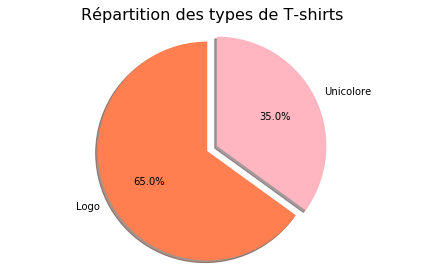

In [11]:
pie_chart_logo ()

## 4 )    Le cas particulier des T-Shirts : statistique sur les logos

Nous allons désormais nous intéresser à une nouvelle statistique sur un paramètre qui pourrait avoir un impact sur l'apprentissage de l'algorithme : la présence de logos. Leur forme, leur couleur et leur texture peut totalement varier d'un T-shirt à l'autre, il pourraît alors être intéressant de reconnaître quelle fraction de la base de donnée représentent ces T-shirts à logo. 

On va procéder par une méthode purement calculatoire ici ; par définition, un logo est une variation de couleur, de texture, au sein du T-shirt. A contrario, un T-shirt unicolor n'est, comme son nom l'indique, que d'une seule couleur.

On peut traduire l'assertion précédente par une propriété locale, en s'intéressant à chaque pixel **p** du t-shirt. Pour un pixel **p** donné, si les pixel environnant sont (à peu près) de même couleur, alors on peut supposer qu'il ne fait pas partie d'un logo. A contrario, s'il y a une grande variance autour d'un pixel du t-shirt, alors soit il est au bord du t-shirt (et la variation est dûe au fond de la photo), soit il fait partie d'un logo. Dans un premier temps, on considérera le premier effet cité comme *négligeable*, lorsqu'on agrège les variances de couleur de chaque pixel, c'est un effet de "bord" qui n'aura d'impact qu'en *une dimension*, alors que l'effet du logo sera en *deux dimensions*. Néanmoins, pour limiter d'autant plus cet impact, nous prendrons le soin d'effectuer un *zoom* au préalable sur chaque photo, de façon à isoler au maximum le T-Shirt du fond.

On formalise ici les notions de variance de couleur de chaque pixel. On définit d'abord une métrique de moyenne, la moyenne de couleur d'un pixel étant la moyenne de sa couleur à lui et des 8 pixels concomitants. 

<ins>Exemple</ins> : 
<img src="https://i.imgur.com/tKTPqyB.png" style="height:350px"> 

In [ ]:
?colour_mean

Puis la variance en découle : 
<img src="https://i.imgur.com/Oe5lG0l.png" style="height:150px">

(Par ailleurs, nous utilisons le mot "variance" pour son côté évocateur, mais en pratique nous avons plutôt considéré l'écart-type qui permet de conserver une homogénéité des valeurs, sur la plage [0,255].)

On obtient dans ce cas-là un écart-type faible entre les couleurs; en effet, on remarque à l'œil nu qu'elles sont toutes plus ou moins proches dans le spectre. En résulte donc un pixel de variance proche du noir. A contrario, si les couleurs des 9 pixels en questions varient fortement (ce qu'on pourrait trouver dans un logo, typiquement), le pixel résultant de l'algorithme sera très proche du blanc. 

<img src="https://i.imgur.com/GcSBHMJ.png" style="height:320px"> 

In [ ]:
?colour_var

Nous allons donc utiliser cette dernière fonction pour créer une version "topographique" de chaque image dans laquelle seules les variations de couleur sont mises en évidence. Chaque pixel d'une image se verra attribué une variance, puis nous allons sommer la variance de chacun de ces pixels pour attribuer un "score" de logo à la photo. Si ce score dépasse un certain seuil (défini arbitrairement là encore), alors l'image du T-shirt sera considérée comme comportant un logo. La fonction **is_logo** met en œuvre tout le processus résumé ci-dessus. Il dit si pour un T-shirt donné, ce T-shirt contient un logo ou non. Cette dernière fonction étant une fonction booléenne, là encore, nous allons avoir recours à la fonction **percentage_true** pour déterminer la fraction des T-shirts comportant un logo.

In [ ]:
?is_logo

In [ ]:
?percentage_true

Mais là encore, visualisons l'effet de l'algorithme avant toute chose avec les fonctions **is_logo_feedback** et **percentage_true_feedback** (qui pour rappel font la même chose que les fonctions originelles, en plus de fournir un retour image à l'utilisateur).

In [ ]:
?is_logo_feedback

In [ ]:
?percentage_true_feedback

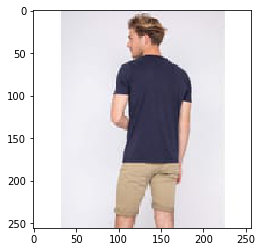

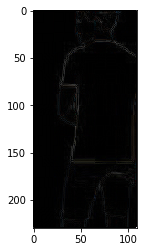

PAS DE LOGO. Score : 12.450742827388664


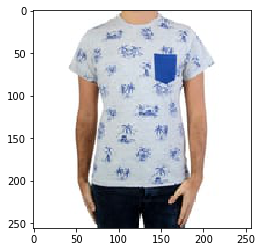

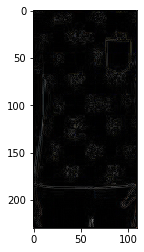

LOGO. Score : 13.030842210216871


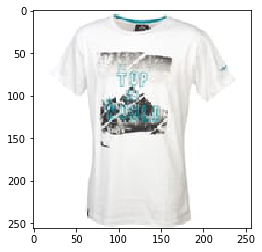

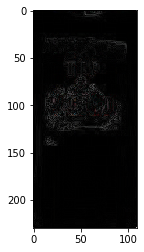

LOGO. Score : 12.78697175670736


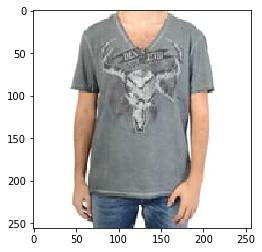

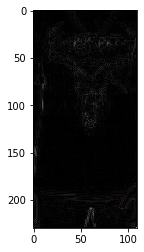

LOGO. Score : 12.864605089123772


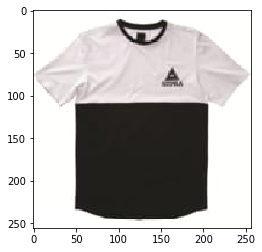

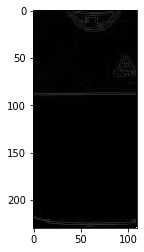

PAS DE LOGO. Score : 12.11382576901773


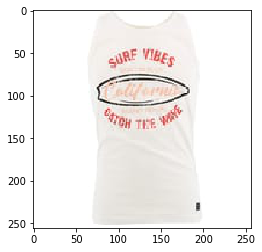

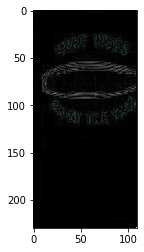

LOGO. Score : 12.956736092559844


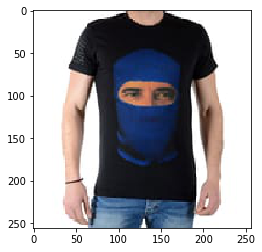

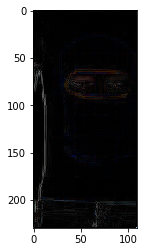

LOGO. Score : 12.73651264357974


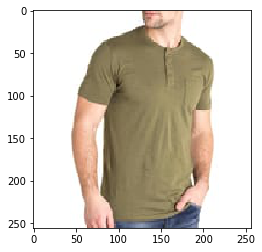

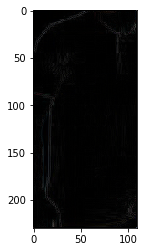

PAS DE LOGO. Score : 12.278681637631584
Dans l'échantillon donné, il y a 62.5 % de T-shirts à logo.


In [ ]:
tshirt_sample = random.sample(data_tshirt,8)

pourcent_sample =  percentage_true_feedback(tshirt_sample, is_logo_feedback)
print("Dans l'échantillon donné, il y a",pourcent_sample ,"% de T-shirts à logo.")

En noir apparaissent les images de variances, sur lesquelles seules les variations de couleur ressortent (en blanc).

Comme vous pouvez le voir, l'algorithme ci-dessus n'a pas une efficacité parfaite, il reconnaît parfois la silhouette d'un mannequin comme étant une variation de couleur, *i.e.* un logo dans notre cas (sur les photos dans lesquelles le zoom n'a pas été suffisant), ce qui peut le pousser à prendre un T-shirt unicolor comme un T-shirt à logo. D'autres fois, c'est l'inverse qui se produit car la couleur du logo est trop proche de la couleur du T-shirt.

Néanmoins, l'algorithme fournit des résultats très satisfaisant vis-à-vis de sa simplicité. La marge d'erreur, même si elle existe, reste relativement faible ; ce qui nous intéresse, c'est estimer une statistique globale sur la base de donnée, ce que cette fonction permet très convenablement.

Voici ci-dessous l'exécution de l'algorithme permettant l'obtention de ce paramètre. Cette fois-ci, nous sommes obligés de travailler sur des photos à bonne résolution (**256x256**), car cet algorithme est très sensible au bruit.

In [ ]:
#Environ 10 minutes d'exécution. Vous pouvez retrouver les résultats que nous avons déjà calculé dans 
#la cellule en dessous.

print("Pourcentage de T-shirts à logo :\n")
percentage_logo_tshirt = percentage_true(data_tshirt, is_logo)
print("Il y a", percentage_logo_tshirt ,"% de T-shirts à logo.\n")


Pourcentage de T-shirts à logo :

200 images. Nous en sommes à : 9.77 % d'avancement.
400 images. Nous en sommes à : 19.54 % d'avancement.
600 images. Nous en sommes à : 29.31 % d'avancement.
800 images. Nous en sommes à : 39.08 % d'avancement.
1000 images. Nous en sommes à : 48.85 % d'avancement.
1200 images. Nous en sommes à : 58.62 % d'avancement.
1400 images. Nous en sommes à : 68.39 % d'avancement.
1600 images. Nous en sommes à : 78.16 % d'avancement.
1800 images. Nous en sommes à : 87.93 % d'avancement.
2000 images. Nous en sommes à : 97.7 % d'avancement.
Il y a 65.0219833903273 % de T-shirts à logo.



In [ ]:
?pie_chart_fond_blanc

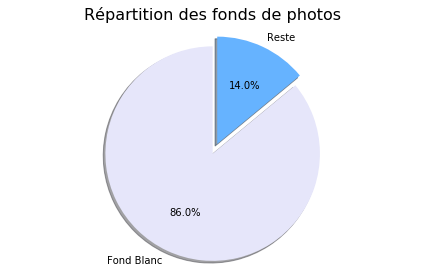

In [9]:
pie_chart_fond_blanc()

Au total, après calcul, nous avons trouvé **65%** de T-Shirts à logo, ce qui représente une part non-négligeable de la base de donnée qu'il conviendra de prendre en compte avant de juger les performances de notre algorithme de reconnaissance d'image.

## 5 ) Premier pas vers le Deep Learning : statistique sur les mannequins

Pour conclure cette partie de Statistique Descriptive, nous allons faire un premier pas vers le Deep Learning en nous intéressant à la proportion de photos comportant un mannequin humain. En effet, ce paramètre est complexe et très compliqué à estimer avec un algorithme classique ; une caractéristique de couleur ou de variance ne permet plus de trancher sur le résultat.

Pour ce faire, nous allons nous baser sur les bibliothèques [opencv](https://opencv.org/) et [ImageAI](http://imageai.org/) afin d'utiliser un algorithme de reconnaissance humaine pré-entraîné. A partir d'une image de vêtement donnée, la fonction **is_human_model** s'occupe de déterminer si le vêtement est porté par un humain ou non. Elle estime d'abord le pourcentage de probabilité qu'une photo contienne un humain, puis renvoie *True* si ce pourcentage dépasse un certain seuil (95% ici).

Là encore, la fonction **percentage_true** généralise ce processus image par image à toute la base de données. 

Cet algorithme pré-entraîné fournit des résultats à l'efficacité impressionnante.

In [ ]:
?is_human_model

In [ ]:
?percentage_true

Encore une fois, vérifions l'efficacité de notre algorithme sur un sous-échantillon avec les fonctions \_feedback.

In [ ]:
?is_human_model_feedback

In [ ]:
?percentage_true_feedback

On charge d'abord les paramètres externes du modèle

In [ ]:
modelRetinaNet = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5'
modelYOLOv3 = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5'
modelTinyYOLOv3 = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5'    
if not os.path.exists('yolo.h5'):
    r = req.get(modelYOLOv3, timeout=0.5)
    with open('yolo.h5', 'wb') as outfile:
        outfile.write(r.content)
            
detector = od()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('yolo.h5')
detector.loadModel()   
 

In [ ]:
tshirt_path = [path + "/tshirt/" + i for i in tshirt]
pull_path = [path + "/pull/" + i for i in pull]
pantalon_path = [path + "/pantalon/" + i for i in pantalon]
short_path = [path + "/short/" + i for i in short]
all_path = tshirt_path + pull_path + pantalon_path  + short_path

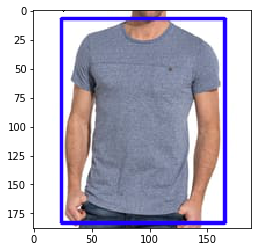

HUMAIN. Pourcentage obtenu par l'algorithme :  99.84292984008789


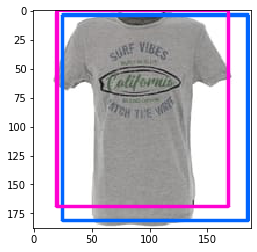

NON-HUMAIN. Pourcentage obtenu par l'algorithme :  33.15943479537964


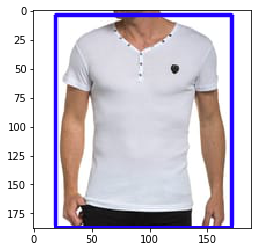

HUMAIN. Pourcentage obtenu par l'algorithme :  99.92740154266357


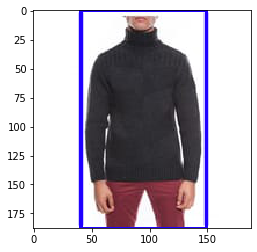

HUMAIN. Pourcentage obtenu par l'algorithme :  96.648108959198


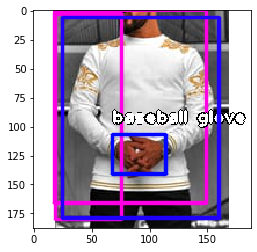

HUMAIN. Pourcentage obtenu par l'algorithme :  99.51257109642029


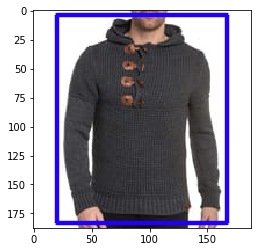

HUMAIN. Pourcentage obtenu par l'algorithme :  99.8888909816742


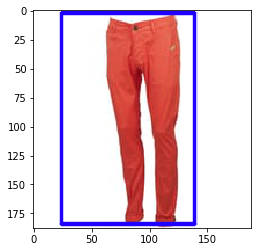

NON-HUMAIN. Pourcentage obtenu par l'algorithme :  84.4603955745697


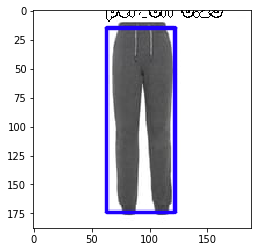

NON-HUMAIN. Pourcentage obtenu par l'algorithme :  24.95082914829254


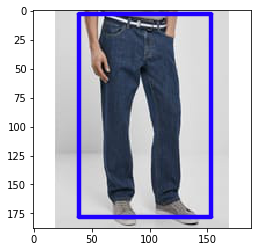

HUMAIN. Pourcentage obtenu par l'algorithme :  99.75717067718506


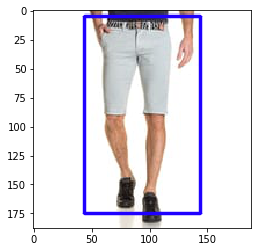

HUMAIN. Pourcentage obtenu par l'algorithme :  98.34252595901489


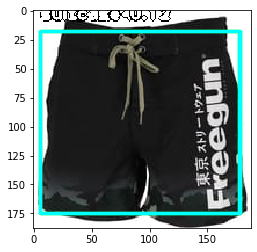

NON-HUMAIN. Pourcentage obtenu par l'algorithme :  14.348900318145752


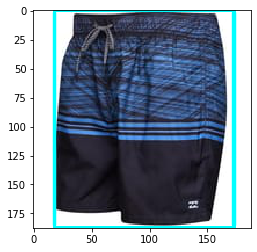

NON-HUMAIN. Pourcentage obtenu par l'algorithme :  11.192236095666885
Dans l'échantillon donné, il y a 58.333333333333336 % de photos sur fond blanc.


In [ ]:
tshirt_sample = random.sample(tshirt_path,3)
pull_sample = random.sample(pull_path,3)
pantalon_sample = random.sample(pantalon_path,3)
short_sample = random.sample(short_path,3)
sample = tshirt_sample + pull_sample + pantalon_sample + short_sample


pourcent_sample =  percentage_true_feedback(sample, is_human_model_feedback)
print("Dans l'échantillon donné, il y a",pourcent_sample ,"% de photos sur fond blanc.")

In [ ]:
#Environ 7 heures d'exécution. Vous pouvez retrouver les résultats que nous avons déjà calculé dans 
#la cellule en dessous.

print("Pourcentage de vêtements à modèle humain :\n")
percentage_human_model = percentage_true(all_path, is_human_model)


Pourcentage de T-shirts à logo :

10 images. Nous en sommes à : 0.28 % d'avancement.
20 images. Nous en sommes à : 0.56 % d'avancement.
30 images. Nous en sommes à : 0.84 % d'avancement.
40 images. Nous en sommes à : 1.12 % d'avancement.
50 images. Nous en sommes à : 1.4 % d'avancement.
60 images. Nous en sommes à : 1.68 % d'avancement.
70 images. Nous en sommes à : 1.96 % d'avancement.
80 images. Nous en sommes à : 2.24 % d'avancement.
90 images. Nous en sommes à : 2.52 % d'avancement.
100 images. Nous en sommes à : 2.8 % d'avancement.
110 images. Nous en sommes à : 3.08 % d'avancement.
120 images. Nous en sommes à : 3.36 % d'avancement.
130 images. Nous en sommes à : 3.64 % d'avancement.
140 images. Nous en sommes à : 3.92 % d'avancement.
150 images. Nous en sommes à : 4.2 % d'avancement.
160 images. Nous en sommes à : 4.48 % d'avancement.
170 images. Nous en sommes à : 4.76 % d'avancement.
180 images. Nous en sommes à : 5.04 % d'avancement.
190 images. Nous en sommes à : 5.32 % d'av

Nous avons laissé l'algorithme (très long) se terminer dans une autre instance de Notebook, voici le résultat obtenu :

<img src="https://i.imgur.com/cedpZuL.png" style="height:350px"> 

In [ ]:
?pie_chart_human_model

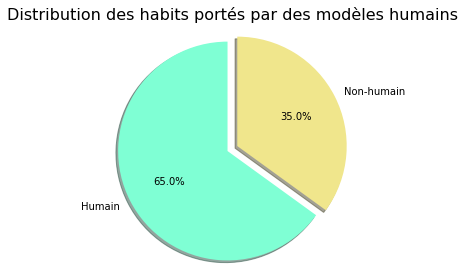

In [10]:
pie_chart_human_model ()

Au total, après calcul, nous avons trouvé donc **64.01%** de vêtements portés par des humains, ce qui là encore représente une part non-négligeable de la base de données, ce qui va fournir un cadre moins confortable pour l'apprentissage d'un algorithme de Deep Learning mais qui, on le verra, n'aura finalement pas tant d'impact.